In [1]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json
import json
import matplotlib.pyplot as plt

In [2]:
path = "../../data/silver/master_weather_merged/toronto_master_weather_merged.csv"
df_final = pd.read_csv(path)
df_final['ds'] = pd.to_datetime(df_final['ds'])

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      614 non-null    int64         
 1   ds              614 non-null    datetime64[ns]
 2   y               614 non-null    int64         
 3   national_index  614 non-null    float64       
 4   week_of_year    614 non-null    int64         
 5   is_holiday      614 non-null    int64         
 6   precip_mm       614 non-null    float64       
 7   snow_depth_cm   614 non-null    float64       
 8   min_temp        614 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 43.3 KB


In [8]:
df_final.head()

,Unnamed: 0,ds,y,national_index,week_of_year,is_holiday,precip_mm,snow_depth_cm,min_temp
0,0,2014-01-06,136,28539.0,2,0,20.8,1.2,-23.8
1,1,2014-01-13,136,3090.0,3,0,12.0,1.2,-24.2
2,2,2014-01-20,155,0.0,4,0,6.0,0.4,-17.3
3,3,2014-01-27,174,0.0,5,0,7.4,0.9,-23.5
4,4,2014-02-03,196,10353.0,6,0,12.8,1.4,-20.3


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      614 non-null    int64         
 1   ds              614 non-null    datetime64[ns]
 2   y               614 non-null    int64         
 3   national_index  614 non-null    float64       
 4   week_of_year    614 non-null    int64         
 5   is_holiday      614 non-null    int64         
 6   precip_mm       614 non-null    float64       
 7   snow_depth_cm   614 non-null    float64       
 8   min_temp        614 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 43.3 KB


In [7]:
df_final['ds'].min(), df_final['ds'].max()


(Timestamp('2014-01-06 00:00:00'), Timestamp('2025-10-06 00:00:00'))

In [4]:
holidays = pd.DataFrame({
  'holiday': 'long_weekend_risk',
  'ds': pd.to_datetime([
      '2024-10-14', '2025-10-13', # Thanksgiving
      '2024-12-25', '2025-12-25', # Christmas
      '2024-12-26', '2025-12-26', # Boxing Day
      '2025-01-01', '2026-01-01', # New Year
      '2024-09-02', '2025-09-01', # Labour Day
      '2024-08-05', '2025-08-04', # Civic Holiday
  ]),
  'lower_window': -2,
  'upper_window': 1,  
})

In [5]:
m_tuned = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    seasonality_mode='multiplicative', 
    changepoint_prior_scale=0.15,      
    seasonality_prior_scale=10.0,      
    holidays=holidays                 
)

m_tuned.add_country_holidays(country_name='CA') # Keep standard ones too

In [6]:
m_tuned.fit(df_final)

10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
with open('../../models/tuned_prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m_tuned), fout)

21:54:07 - cmdstanpy - INFO - Chain [1] start processing
21:54:07 - cmdstanpy - INFO - Chain [1] done processing


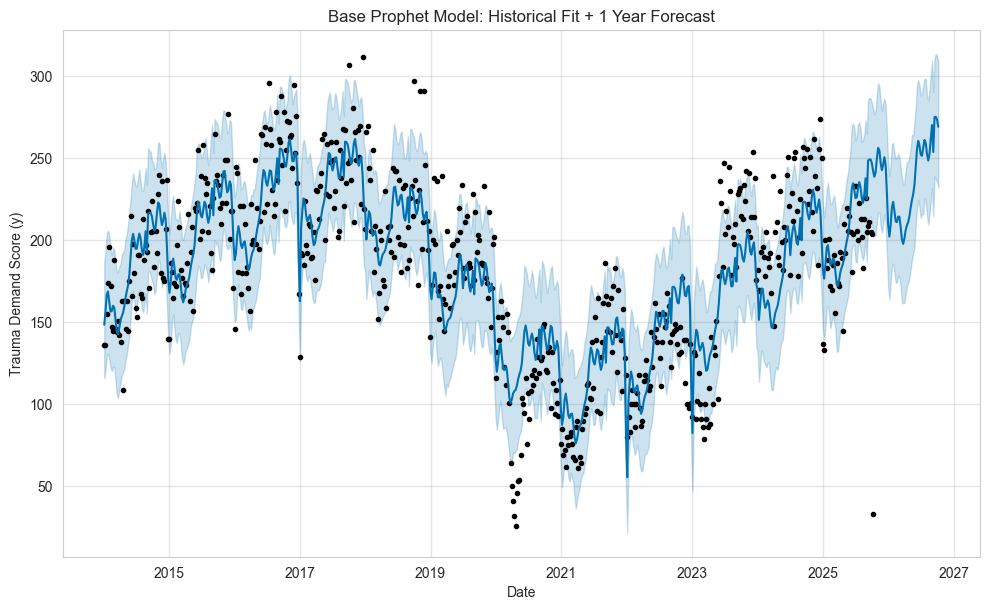

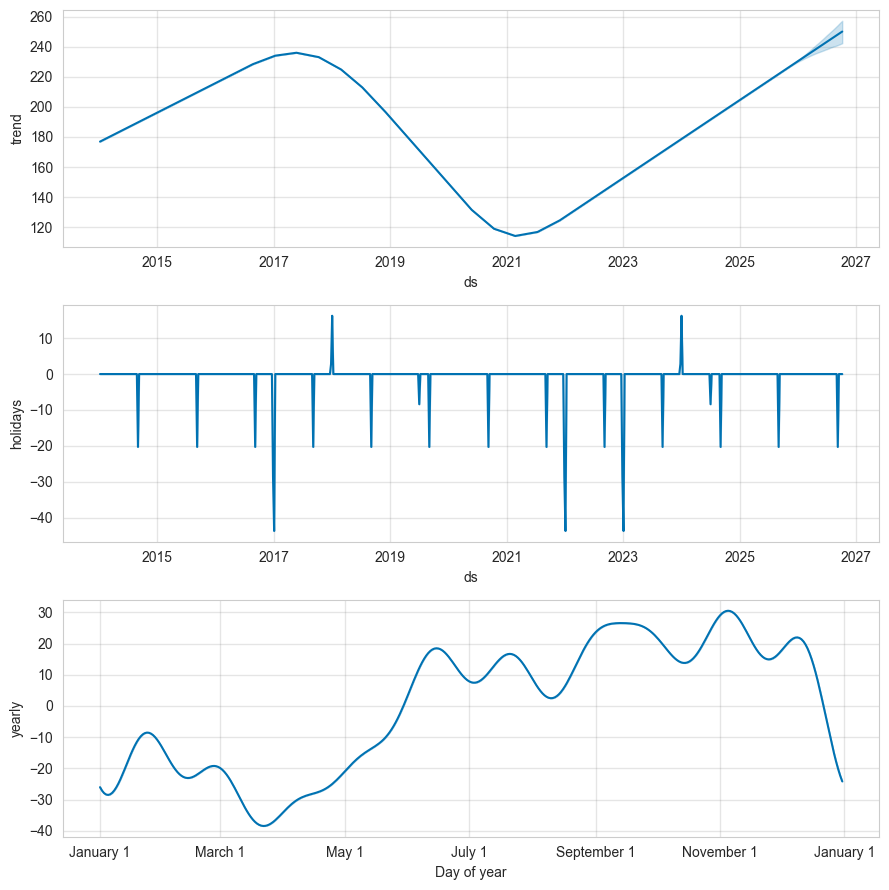